# 如何得到一个圆形的边界呢?
![cir](img/cir.png)

# 添加多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:,1] ** 2 < 1.5, dtype="int")

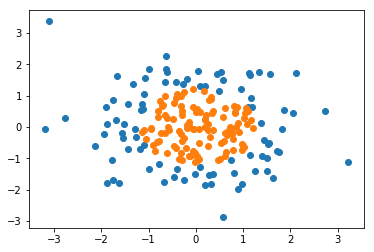

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## 使用逻辑回归

In [4]:
from playML.LogisticRegression import LogisticRegression

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [6]:
log_reg.score(X, y)

0.605

In [7]:
def plot_decision_boundry(model, axis):
    # meshgrid 可以参考项目03-第3章JupyterNotebook_numpy和map/numpy.ipynb
    # 其实就是分别生成按行看的矩阵和 按列看的矩阵
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    return

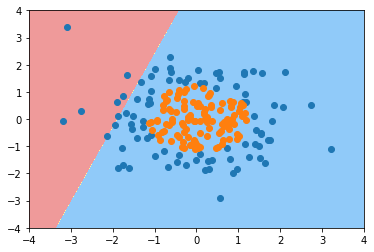

In [8]:
plot_decision_boundry(log_reg, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [10]:
def PolyLogReg(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std", StandardScaler()),
        ("logreg", LogisticRegression())
    ])

In [11]:
ploy_log_reg = PolyLogReg(2)

In [12]:
ploy_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression())])

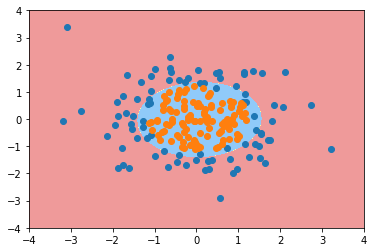

In [13]:
plot_decision_boundry(ploy_log_reg, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [14]:
ploy_log_reg.score(X,y)

0.915

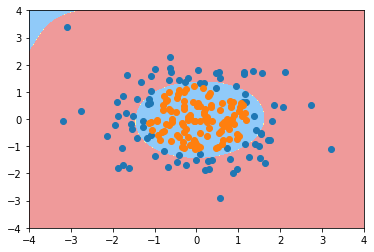

In [15]:
ploy_log_reg2 = PolyLogReg(20)
ploy_log_reg2.fit(X, y)
plot_decision_boundry(ploy_log_reg2, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## 不规则的图像预示着过拟合发生
### 解决办法就是减少degree或者正则化
### 下面看下sklearn中如何解决过拟合
## 前面的正则化
在正则化前面引入系数来决定一个正则化与损失函数之间的重要性:
![reg1](img/reg1.png)
新的:在损失函数前加上C(逻辑回归/SVM更偏好后者, 因为必须包含正则化):
![reg2](img/reg2.png)

# sklearn中的逻辑回归和正则化

In [20]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:,1] < 1.5, dtype="int")
# add some noise
for _ in range(20):
    y[np.random.randint(200)] = 1

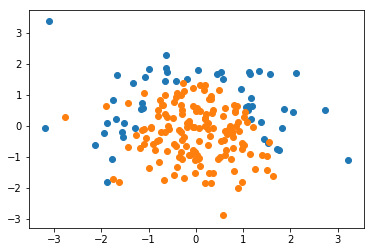

In [21]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# penalty: L2 正则化
# C=1.0
# 注意此时还没有多项式

In [26]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [27]:
log_reg.score(X_test, y_test)

0.86

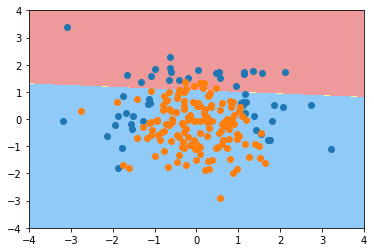

In [29]:
plot_decision_boundry(log_reg, [-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [30]:
# 使用多项式
def PolyLogisticReg(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std", StandardScaler()),
        ("log", LogisticRegression())
    ])

In [31]:
polyreg = PolyLogisticReg(2)
polyreg.fit(X_train, y_train)
polyreg.score(X_train, y_train)

0.9133333333333333

In [32]:
polyreg.score(X_test, y_test)

0.94

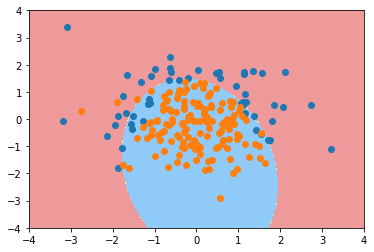

In [34]:
plot_decision_boundry(polyreg, [-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [35]:
# degree较高时
polyreg20 = PolyLogisticReg(20)
polyreg20.fit(X_train, y_train)
polyreg20.score(X_train, y_train)

0.94

In [36]:
polyreg20.score(X_test, y_test)

0.92

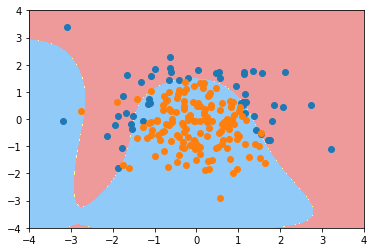

In [37]:
plot_decision_boundry(polyreg20, [-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [38]:
# 加入正则化来限制Jtheta

In [39]:
# 使用多项式
def PolyLogisticReg(degree, C):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std", StandardScaler()),
        ("log", LogisticRegression(C=C))
    ])

In [40]:
polyreg3 = PolyLogisticReg(20, C=0.1)
polyreg3.fit(X_train, y_train)
polyreg3.score(X_train, y_train)

0.8533333333333334

In [41]:
polyreg3.score(X_test, y_test)

0.92

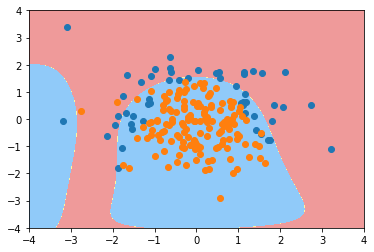

In [43]:
plot_decision_boundry(polyreg3, [-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
# 可以看出来图像更倾向于degree=2时的图像

In [44]:
# 看看L1正则项

In [45]:
def PolyLogisticReg(degree, C, penalty="l2"):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std", StandardScaler()),
        ("log", LogisticRegression(C=C, penalty=penalty))
    ])

In [46]:
polyreg4 = PolyLogisticReg(20, C=0.1, penalty="l1")
polyreg4.fit(X_train, y_train)
polyreg4.score(X_train, y_train)

0.8266666666666667

In [47]:
polyreg4.score(X_test, y_test)

0.9

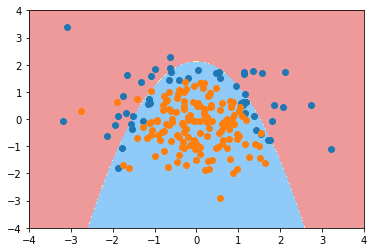

In [49]:
plot_decision_boundry(polyreg4, [-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [50]:
# 这里可以看到L1 正则化项更加倾向于使多项式前面的系数为0
# L2则更倾向于使每项都有值但是和最小

In [51]:
# 如何解决多分类问题?